In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style('darkgrid')

In [8]:
large_cap=os.listdir("./data/Large_Cap/")
large= random.sample(large_cap, 10)
mid_cap=os.listdir("./data/Mid_Cap/")
mid= random.sample(mid_cap, 10)
small_cap=os.listdir("./data/Small_Cap/")
small= random.sample(small_cap, 10)

In [11]:
portfolio=pd.DataFrame()
for i in large:
    df=pd.read_csv('./data/Large_Cap/{}'.format(i))
    portfolio['{}'.format(df['Symbol'].iloc[1])]=df['Close Price']
    
for i in mid:
    df=pd.read_csv('./data/Mid_Cap/{}'.format(i))
    portfolio['{}'.format(df['Symbol'].iloc[1])]=df['Close Price']
    
for i in small:
    df=pd.read_csv('./data/Small_Cap/{}'.format(i))
    portfolio['{}'.format(df['Symbol'].iloc[1])]=df['Close Price']

In [18]:
potfolio = portfolio.dropna()
portfolio.shape

(495, 30)

In [19]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights


array([0.03306613, 0.03507014, 0.01202405, 0.04408818, 0.05410822,
       0.02204409, 0.05611222, 0.01903808, 0.00801603, 0.06412826,
       0.00901804, 0.00300601, 0.03507014, 0.01603206, 0.03707415,
       0.04709419, 0.01302605, 0.01302605, 0.05511022, 0.05511022,
       0.01903808, 0.04008016, 0.05911824, 0.06212425, 0.04509018,
       0.03507014, 0.03507014, 0.01002004, 0.03907816, 0.0240481 ])

In [20]:
working_days_per_year    = 252
portfolio_summary = pd.DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,returns,volatility
IOC,-0.412864,0.499540
DRREDDY,0.080967,0.297441
INFY,-0.025597,0.418558
TCS,0.080520,0.430949
HDFCBANK,0.163186,0.256612
BAJFINANCE,0.453413,0.320735
EICHERMOT,-0.176127,0.299880
CIPLA,0.019919,0.253941
AXISBANK,0.232722,0.277636
LT,-0.085730,0.314004


Text(0, 0.5, 'inertia - % change')

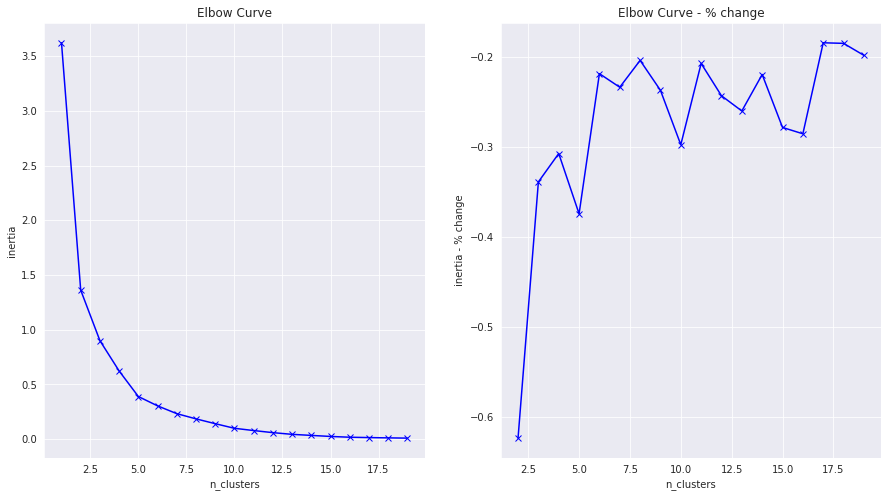

In [25]:
from sklearn.cluster import KMeans
elbow_curve = [None]+[KMeans(n_clusters=n, random_state=0).fit(portfolio_summary).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,2, figsize=(15,8))
axes[0].plot( elbow_curve ,'bx-')
axes[0].set_title('Elbow Curve')    
axes[0].set_xlabel('n_clusters')
axes[0].set_ylabel('inertia')

axes[1].plot( pd.Series(elbow_curve).pct_change(),'bx-' )
axes[1].set_title('Elbow Curve - % change')    
axes[1].set_xlabel('n_clusters')
axes[1].set_ylabel('inertia - % change')

In [26]:
centres = KMeans(n_clusters=5, random_state=0).fit(portfolio_summary)

In [27]:
portfolio_summary['cluster']=centres.labels_

In [28]:
portfolio_summary

,returns,volatility,cluster
IOC,-0.412864,0.499540,1
DRREDDY,0.080967,0.297441,0
INFY,-0.025597,0.418558,2
TCS,0.080520,0.430949,0
HDFCBANK,0.163186,0.256612,0
BAJFINANCE,0.453413,0.320735,4
EICHERMOT,-0.176127,0.299880,2
CIPLA,0.019919,0.253941,0
AXISBANK,0.232722,0.277636,0
LT,-0.085730,0.314004,2


In [38]:
portfolio_summary.iloc[0].name

'IOC'

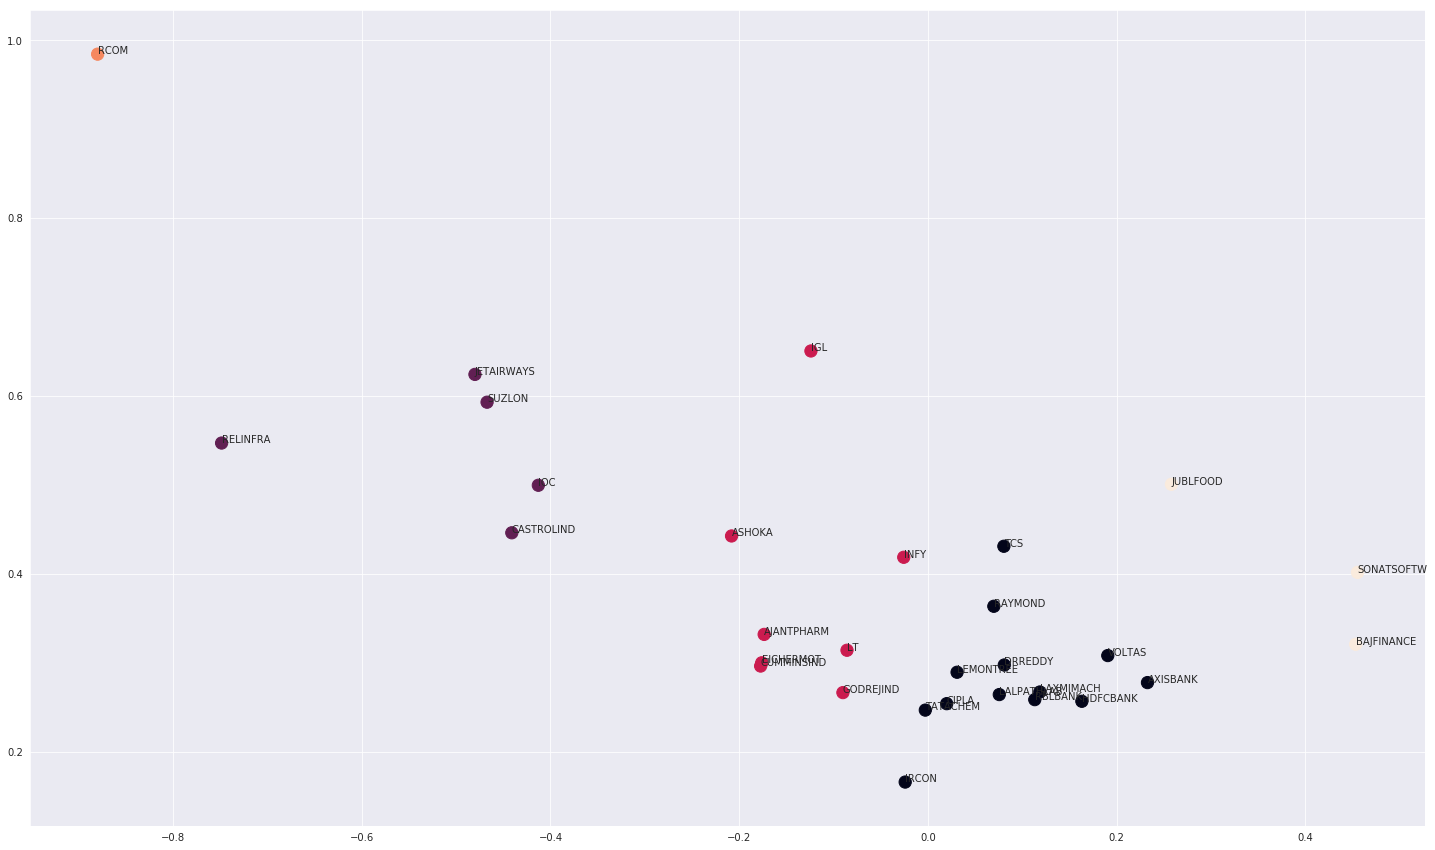

In [60]:
plt.figure(figsize=(25, 15))
z , y = list(portfolio_summary['returns']), list(portfolio_summary['volatility'])
plt.scatter(z,y, c=portfolio_summary['cluster'].astype(float), s=150)

names = [portfolio_summary.iloc[i].name for i in range(len(portfolio_summary))]
for i, txt in enumerate(names):
    plt.annotate(txt, (z[i], y[i]))